### Problem Statement

Scenario

You have been contracted by a tax firm to help them sell tax preparation software. They have built a dataset over the last 2 years of customer information and recorded whether they were able to sell successfully to each customer. They want to understand this data and build a model to predict if they w ill be able to successfully sell their software to a given individual. Some of the column names are descriptive, but many are not. The quality of the data cannot be guaranteed, so there may be errors or otherwise dirty data.

Objectives
1. Explore and analyze the data. What can you tell the client about this dataset?
2. Build two models that use the dataset in order to predict the “successful_sell” variable. These tw o models cannot be the same type of model. For example, if you used logistic regression for
the first model, you could not use logistic regression for the second model.
3. Present the results to a business audience and to a technical audience.


### Import packages and libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

### Read in data

In [31]:
df = pd.read_csv("project_data.csv")
df.head()

,age,b1,b2,c10,c3,c4,c8,dow,employment,i1,...,i5,marriage-status,month,n2,n3,n4,n5,n6,school,successful_sell
0,34,yes,no,no,FALSE,new,NaN,fri,management,-1.8,...,5099.1,divorced,apr,2,530,999,0.001771,0,5 - a decent amount,no
1,28,yes,no,yes,FALSE,new,NaN,thu,assistant,-1.8,...,5099.1,divorced,may,1,750,999,-1.673152,0,5 - a lot,yes
2,55,no,no,no,unknown,new,NaN,tue,leisure,1.4,...,5228.1,married,jul,3,600,999,0.927946,0,2 - a little bit,no
3,47,yes,no,no,FALSE,new,NaN,mon,assistant,-0.1,...,5195.8,married,nov,1,860,999,0.203013,0,5 - a lot,no
4,49,no,no,no,unknown,new,NaN,tue,assistant,1.4,...,5228.1,married,jul,6,620,999,0.990804,0,5 - a lot,no


### Descriptive Statistics

In [32]:
# Number of rows and columns 
df.shape

(41188, 23)

In [33]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
b1,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b2,40198,2,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c10,41188,2,no,36548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c3,41188,3,FALSE,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c4,41188,2,new,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c8,5625,2,no,4252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dow,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment,41188,12,assistant,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i1,41188.0,NaN,NaN,NaN,0.081886,1.57096,-3.4,-1.8,1.1,1.4,1.4


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   b1               41188 non-null  object 
 2   b2               40198 non-null  object 
 3   c10              41188 non-null  object 
 4   c3               41188 non-null  object 
 5   c4               41188 non-null  object 
 6   c8               5625 non-null   object 
 7   dow              41188 non-null  object 
 8   employment       41188 non-null  object 
 9   i1               41188 non-null  float64
 10  i2               41188 non-null  float64
 11  i3               41188 non-null  float64
 12  i4               41188 non-null  float64
 13  i5               41188 non-null  float64
 14  marriage-status  41108 non-null  object 
 15  month            41188 non-null  object 
 16  n2               41188 non-null  int64  
 17  n3          

In [35]:
# column type
df.dtypes

age                  int64
b1                  object
b2                  object
c10                 object
c3                  object
c4                  object
c8                  object
dow                 object
employment          object
i1                 float64
i2                 float64
i3                 float64
i4                 float64
i5                 float64
marriage-status     object
month               object
n2                   int64
n3                   int64
n4                   int64
n5                 float64
n6                   int64
school              object
successful_sell     object
dtype: object

Missing value counts and percentages

In [36]:
df.isnull().sum()

age                    0
b1                     0
b2                   990
c10                    0
c3                     0
c4                     0
c8                 35563
dow                    0
employment             0
i1                     0
i2                     0
i3                     0
i4                     0
i5                     0
marriage-status       80
month                  0
n2                     0
n3                     0
n4                     0
n5                     0
n6                     0
school              1731
successful_sell        0
dtype: int64

In [37]:
(df.isnull().sum()/(len(df)))*100

age                 0.000000
b1                  0.000000
b2                  2.403613
c10                 0.000000
c3                  0.000000
c4                  0.000000
c8                 86.343110
dow                 0.000000
employment          0.000000
i1                  0.000000
i2                  0.000000
i3                  0.000000
i4                  0.000000
i5                  0.000000
marriage-status     0.194231
month               0.000000
n2                  0.000000
n3                  0.000000
n4                  0.000000
n5                  0.000000
n6                  0.000000
school              4.202680
successful_sell     0.000000
dtype: float64

There are 4 columns - b2 c8, marriage-status, school - that have missing values. 
c8 has 86% of its values missing. It can be removed completely from the dataset.

The percentages of missing values in b2, marriage-status and school are 2.4%, 0.19% and 4.2 % respectively. These rows will be removed from the dataset

In [38]:
# Drop c8 
df = df.drop(['c8'], axis=1)

# Remove missing values rows from columns 'marriage-status', 'b2','school' 
df = df[df['marriage-status'].notna()]
df = df[df['b2'].notna()]
df = df[df['school'].notna()]

In [39]:
# Recheck for null values
df.isnull().sum()

age                0
b1                 0
b2                 0
c10                0
c3                 0
c4                 0
dow                0
employment         0
i1                 0
i2                 0
i3                 0
i4                 0
i5                 0
marriage-status    0
month              0
n2                 0
n3                 0
n4                 0
n5                 0
n6                 0
school             0
successful_sell    0
dtype: int64

### Check for class imbalance

In [40]:
df['successful_sell'].value_counts()

successful_sell
no     34160
yes     4277
Name: count, dtype: int64

In [41]:
print("percentage of NO and YES \n", df['successful_sell'].value_counts()*100/len(df))

percentage of NO and YES 
 successful_sell
no     88.872701
yes    11.127299
Name: count, dtype: float64


The percentages of positive and negative class is 11% and 89% respectively. The dataset is an imbalanced one.

### Exploratory Data Analysis (EDA)

In [42]:
# Separate the features into categorical and numeric

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numeric Variables:")
print(num_cols)

Categorical Variables:
Index(['b1', 'b2', 'c10', 'c3', 'c4', 'dow', 'employment', 'marriage-status',
       'month', 'school', 'successful_sell'],
      dtype='object')
Numeric Variables:
['age', 'i1', 'i2', 'i3', 'i4', 'i5', 'n2', 'n3', 'n4', 'n5', 'n6']


### EDA: Univariate analysis

Categorical Variables

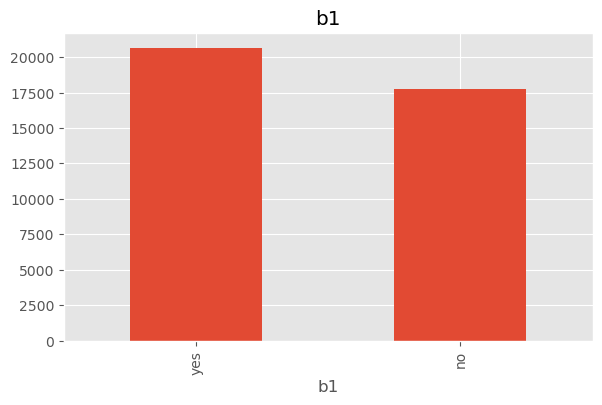

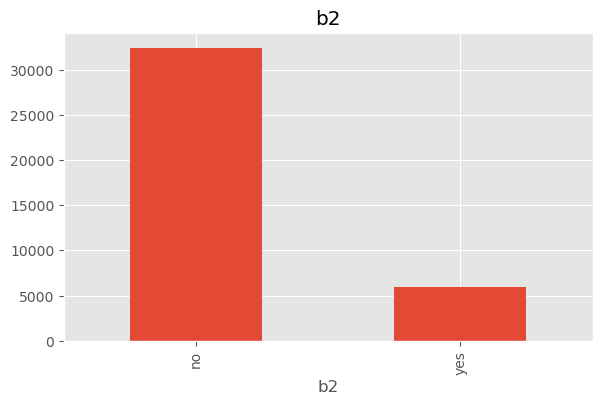

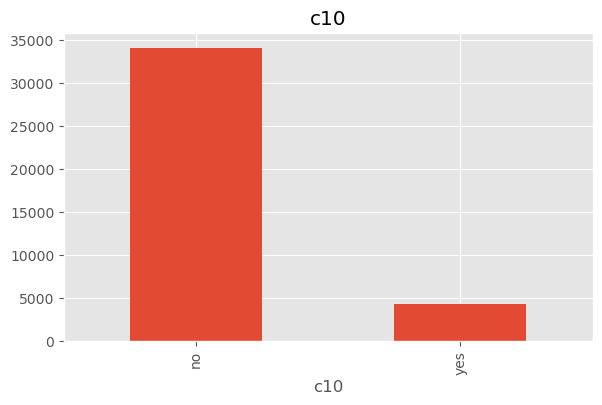

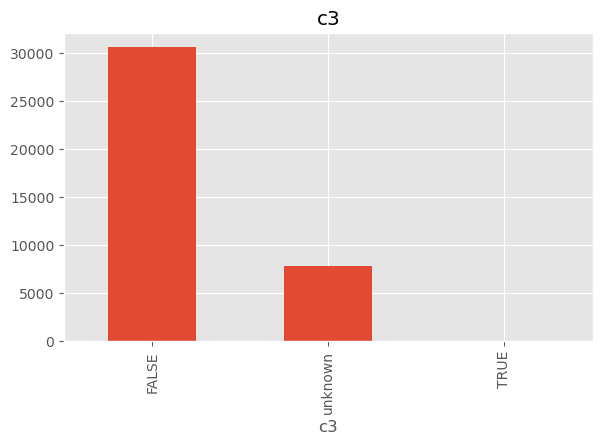

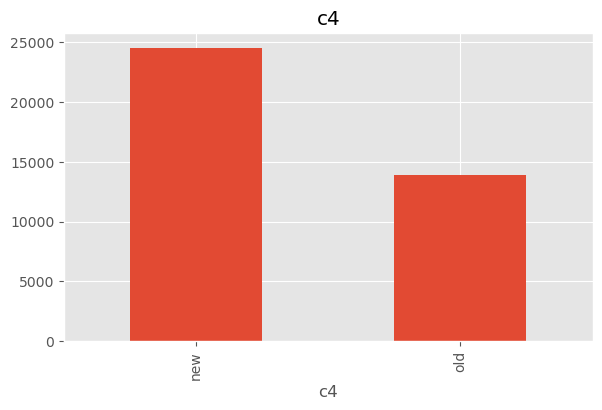

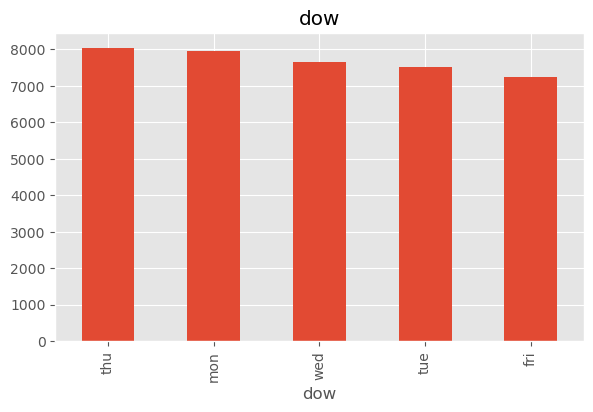

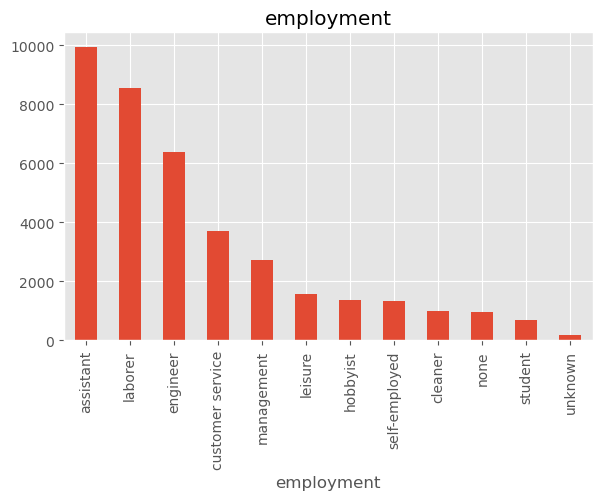

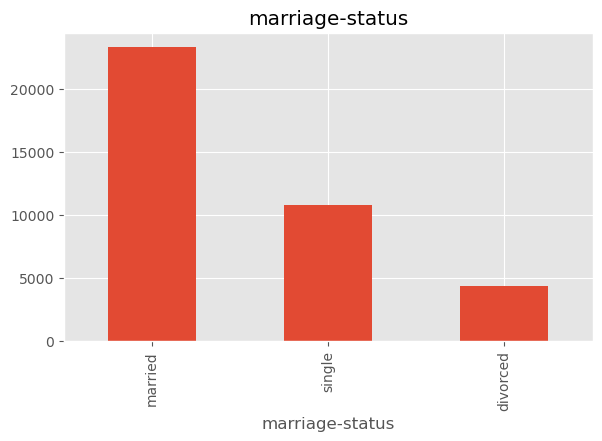

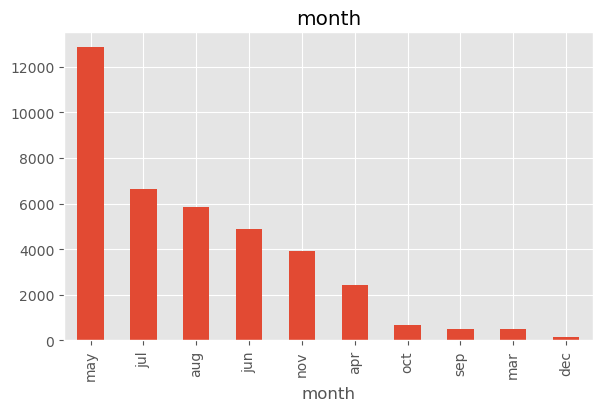

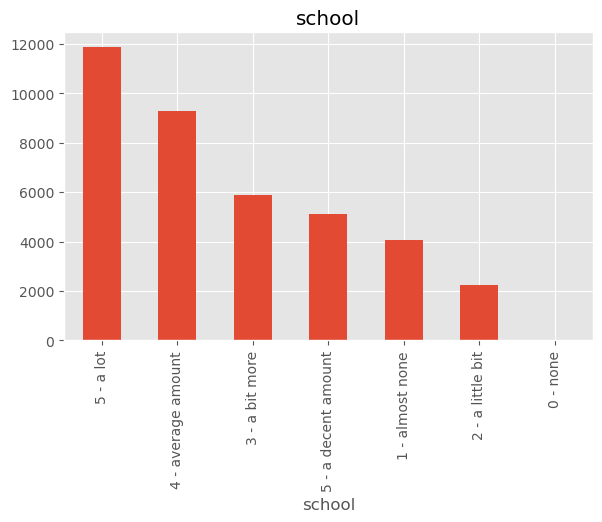

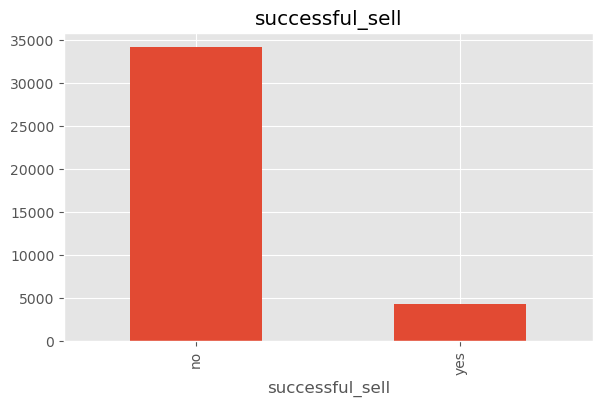

In [43]:
# Plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_cols:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.title(column)


c3

In [44]:
# Value counts in c3
print("percentage of each value in c3 \n", df['c3'].value_counts()*100/len(df))

percentage of each value in c3 
 c3
FALSE      79.613393
unknown    20.378802
TRUE        0.007805
Name: count, dtype: float64


In [45]:
# Data reduction: Remove c3 because most values are FALSE or blank. (Only 3 rows have c3 = TRUE)
df = df.drop(['c3'], axis=1)
cat_cols=df.select_dtypes(include=['object']).columns

Numerical Variables

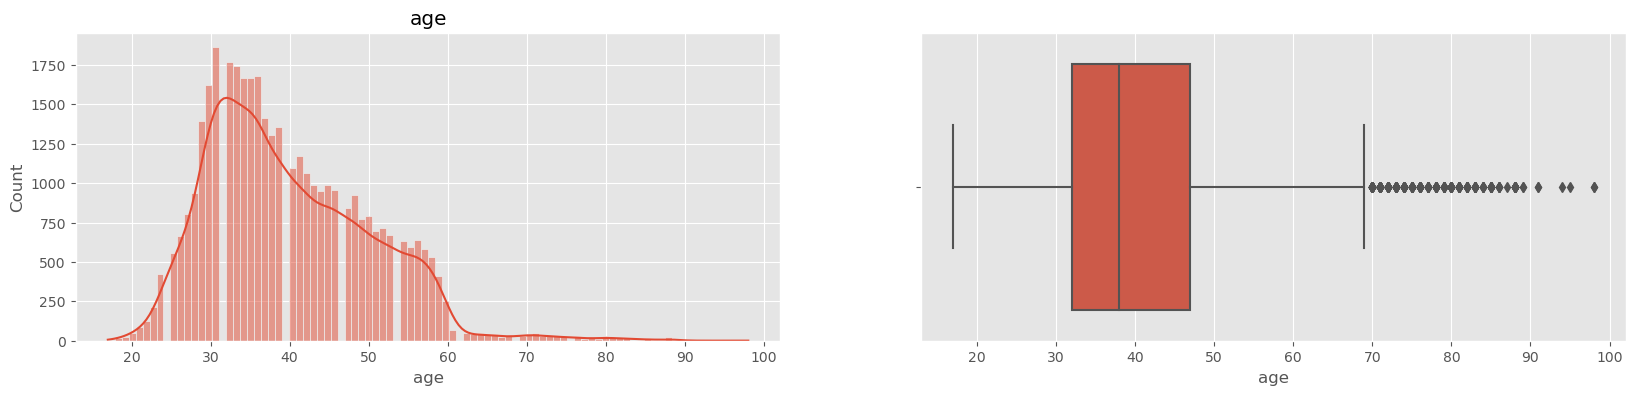

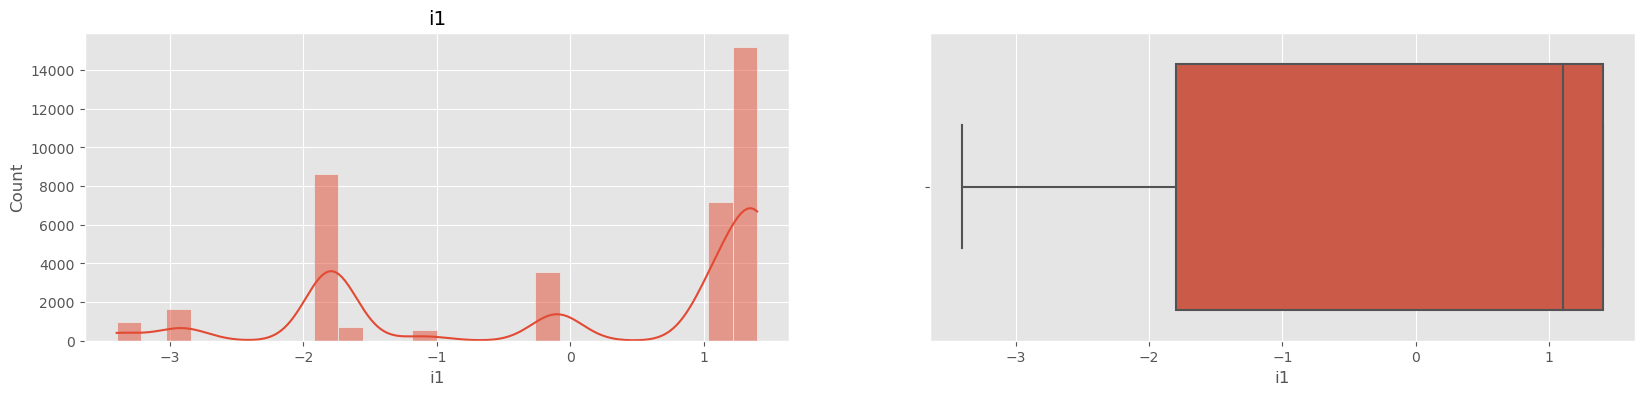

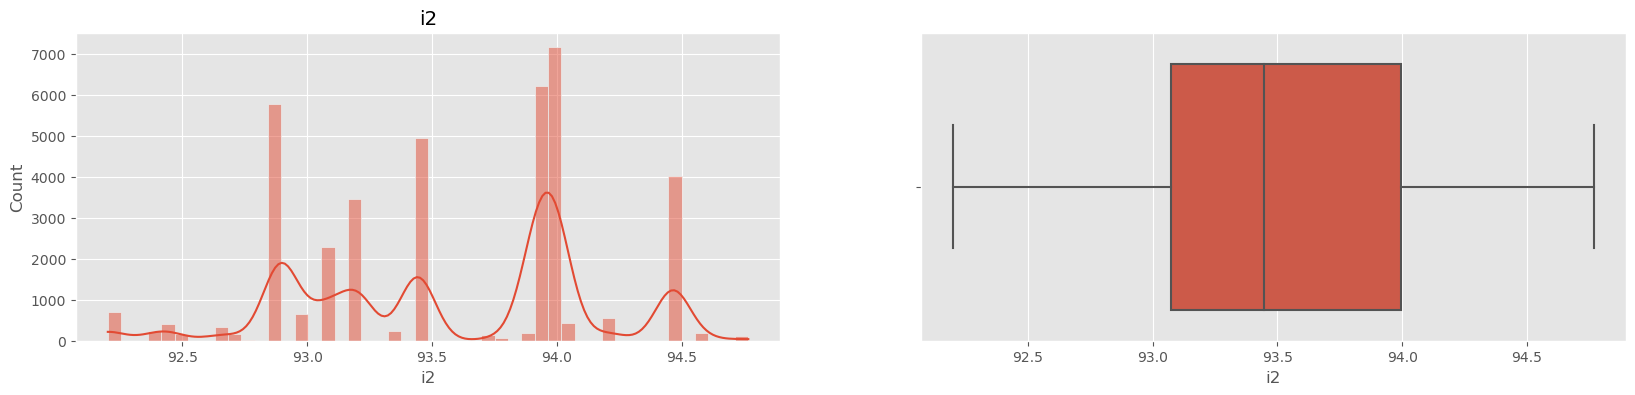

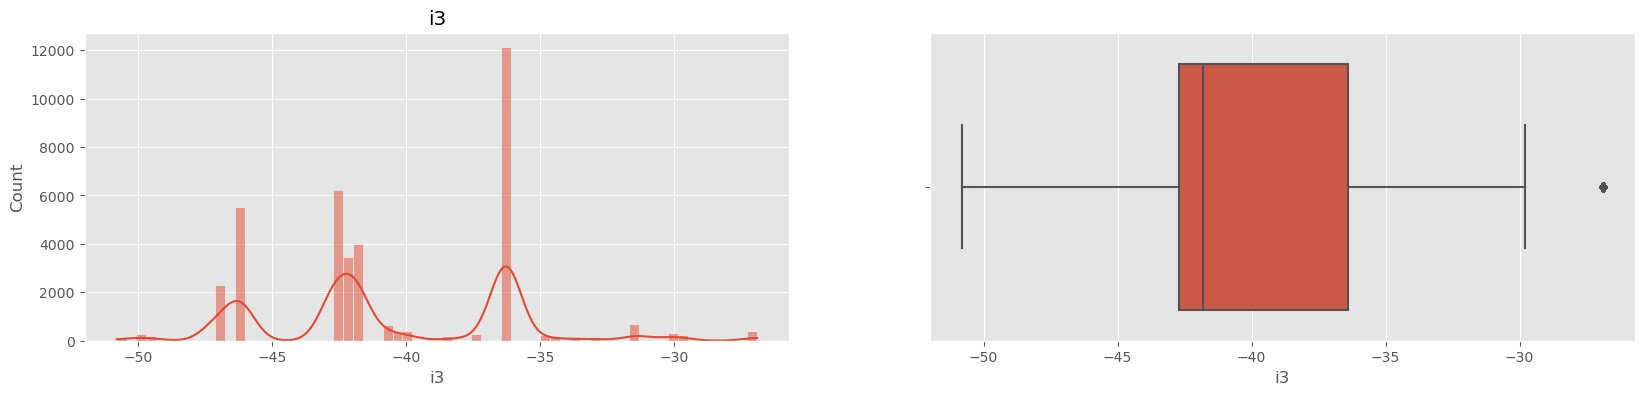

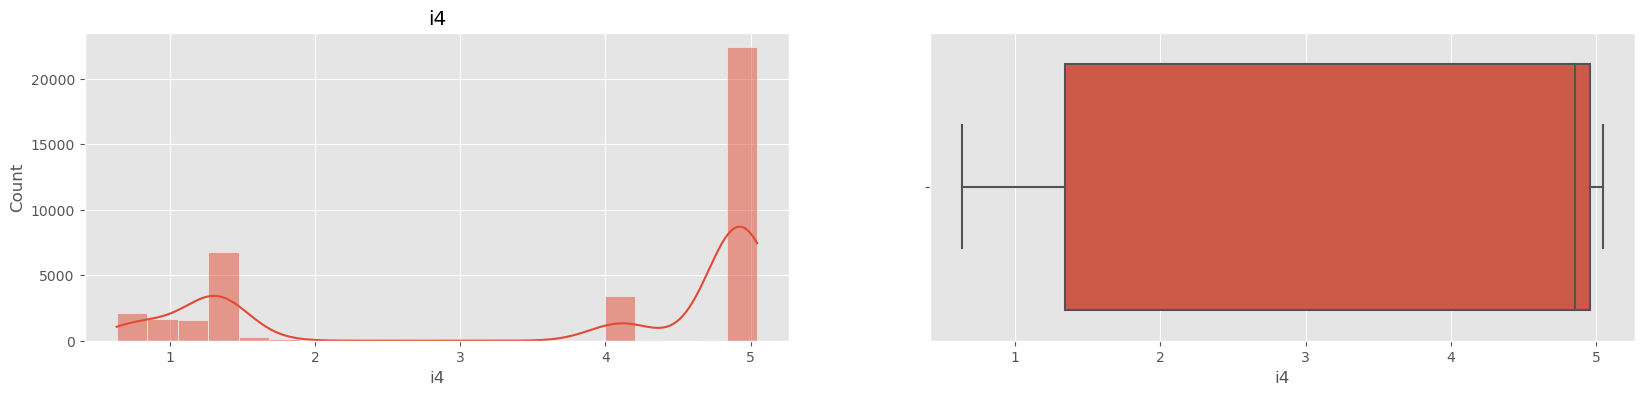

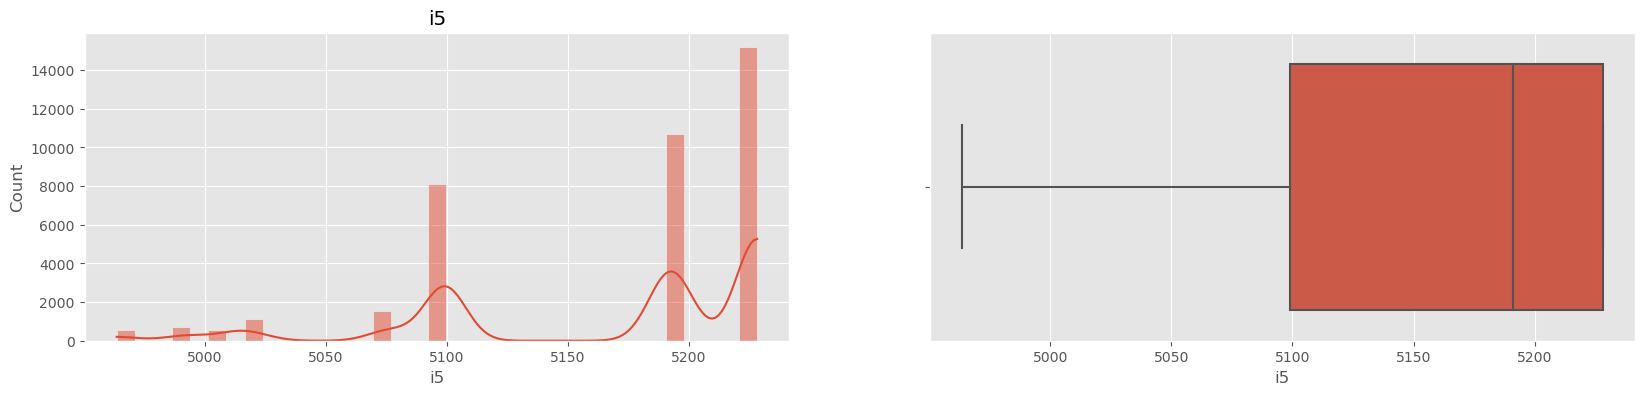

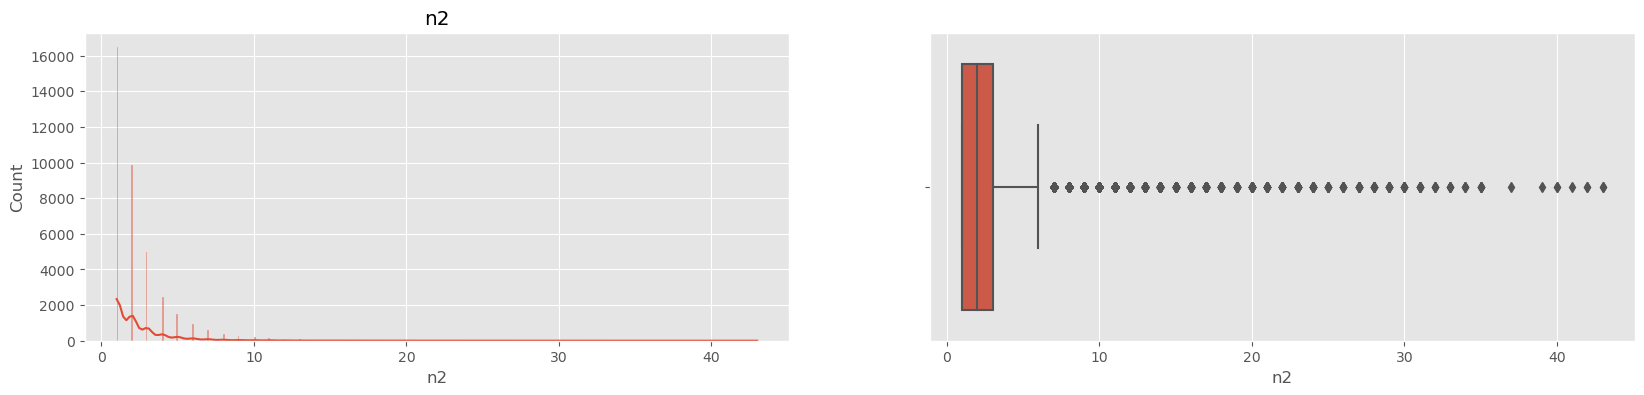

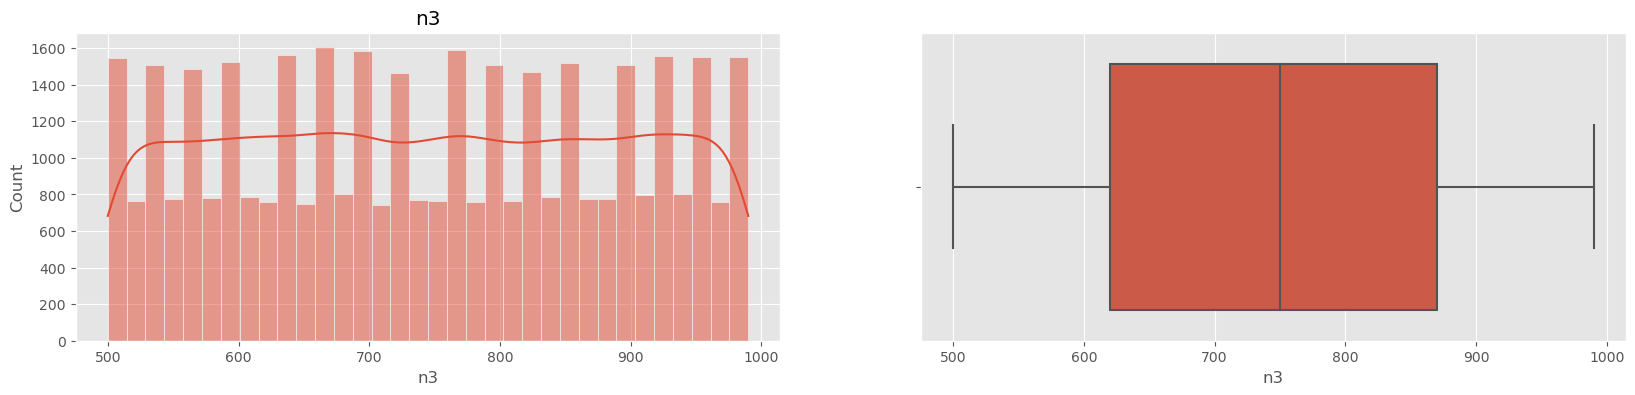

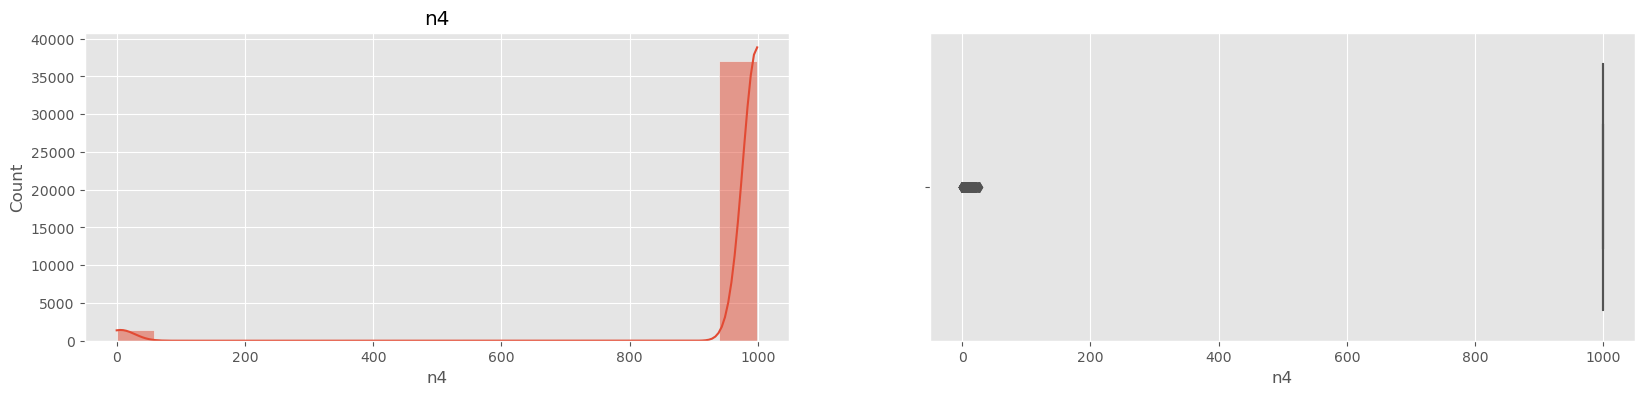

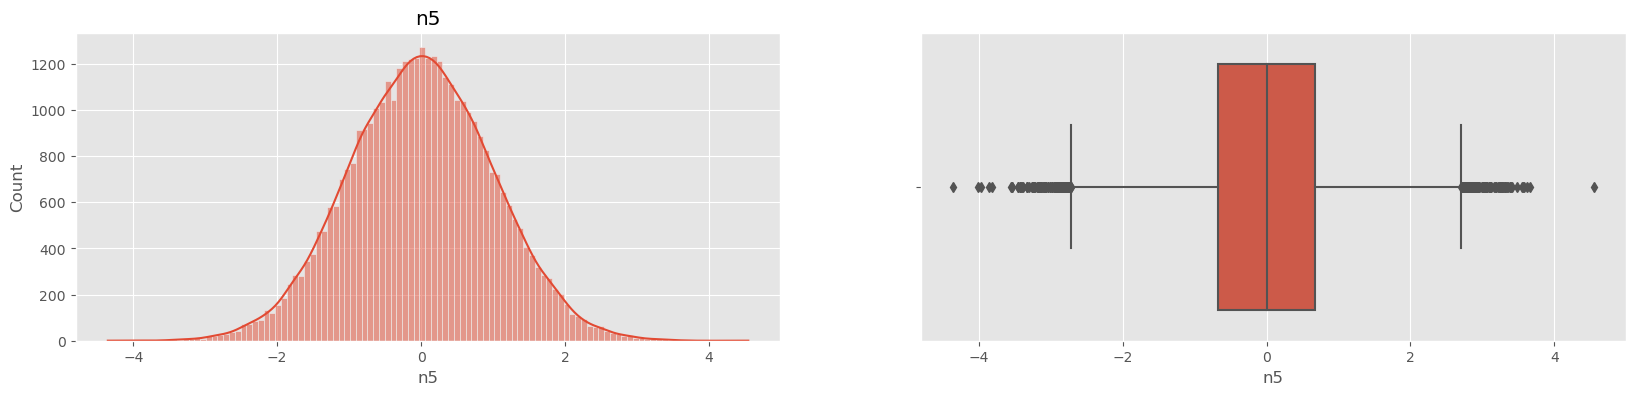

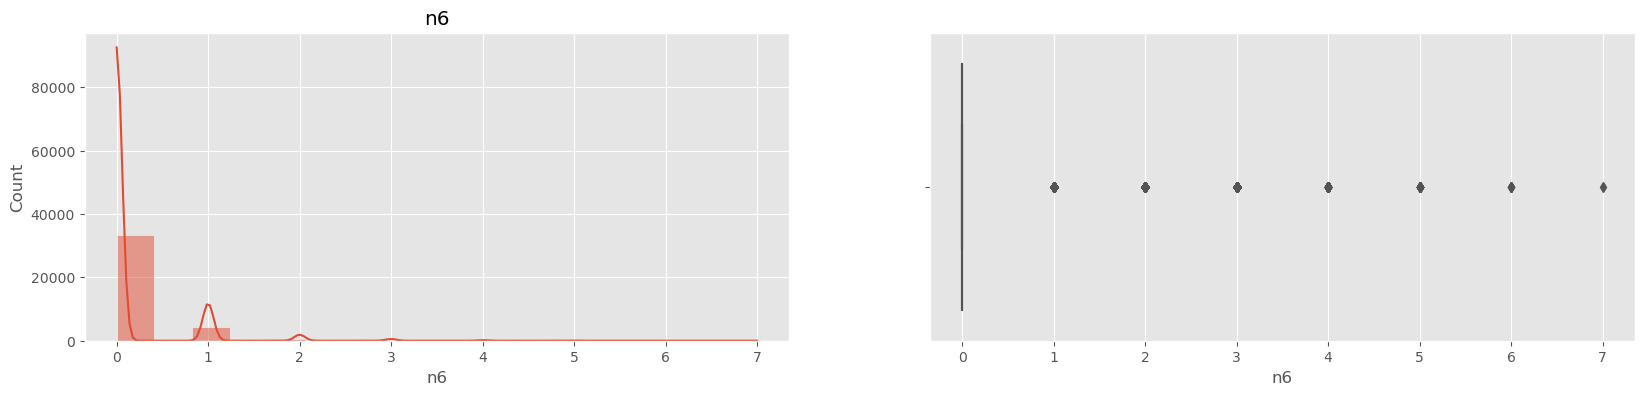

In [46]:
# Plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in num_cols:
    
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])

### Assumptions

“c4” : Account status of the individual
“Month”: month of last contact with individual
“Dow” day of last contact with individual

n4

In [47]:
print("percentage of each value in n4 \n", df['n4'].value_counts()*100/len(df))

percentage of each value in n4 
 n4
999    96.412311
3       1.040664
6       0.991232
4       0.275776
2       0.153498
9       0.143091
12      0.137888
7       0.135286
5       0.117075
10      0.114473
13      0.088456
11      0.067643
1       0.065041
15      0.057237
14      0.046830
0       0.039025
8       0.036423
16      0.020813
17      0.015610
18      0.013008
19      0.007805
22      0.007805
21      0.005203
27      0.002602
26      0.002602
25      0.002602
Name: count, dtype: float64


n4 is mostly a constant value, 999 (96%). Should be removed.

n6

In [48]:
print("percentage of each value in n6 \n", df['n6'].value_counts()*100/len(df))

percentage of each value in n6 
 n6
0    86.466165
1    11.054453
2     1.769129
3     0.507324
4     0.148295
5     0.041627
6     0.010407
7     0.002602
Name: count, dtype: float64


86% values in n6 are zeros. Should be removed for model simplicity.

In [49]:
# Drop n4 and n6 
df = df.drop(['n4','n6'], axis=1)
num_cols = df.select_dtypes(include=np.number).columns.tolist()

Observations from Univariate analysis 

1. The plot for the target variable(successful_sell) shows heavy imbalance.
2. Most of the inidividuals belong to the 32 to 47 age group
3. Most of the individuals are married, followed by single, then divorced
4. Most belong to the profession "Assistant", followed by "Laborer" then "Engineer"
6. Last interaction with majority of individuals took place in May, followed by July, then August.
7. c10 column is identical to the target variable successful_sell.
8. Missing values in c3 has been represented as "unknown". 


### Remove outliers


In [50]:
df[num_cols].describe()

,age,i1,i2,i3,i4,i5,n2,n3,n5
count,38437.000000,38437.000000,38437.000000,38437.000000,38437.000000,38437.000000,38437.000000,38437.000000,38437.000000
mean,39.876135,0.083271,93.570895,-40.533939,3.623921,5167.420251,2.565887,745.375029,-0.001264
std,10.295000,1.566623,0.576455,4.623527,1.730387,71.780871,2.765567,144.400923,0.997184
min,17.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000,500.000000,-4.354231
25%,32.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000,620.000000,-0.681597
50%,38.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,2.000000,750.000000,0.000331
75%,47.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000,870.000000,0.674239
max,98.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,43.000000,990.000000,4.547729


n2 is skewed to the right so remove outiers

In [51]:
# Compute interquantile range to calculate the boundaries
col = "n2"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

# Drop rows containing outliers
df = df.drop(outliers.index)

In [52]:
df[num_cols].describe()

,age,i1,i2,i3,i4,i5,n2,n3,n5
count,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000
mean,39.871817,0.037582,93.557586,-40.533268,3.578319,5165.401920,2.045545,745.730818,-0.002533
std,10.317324,1.577073,0.578460,4.675095,1.742694,72.407217,1.281872,144.284798,0.997199
min,17.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000,500.000000,-4.354231
25%,32.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,1.000000,620.000000,-0.683006
50%,38.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,2.000000,750.000000,-0.001351
75%,47.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000,870.000000,0.673571
max,98.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,6.000000,990.000000,4.547729


### EDA: Bivariate analysis

Plot each categorical variable against the target variable

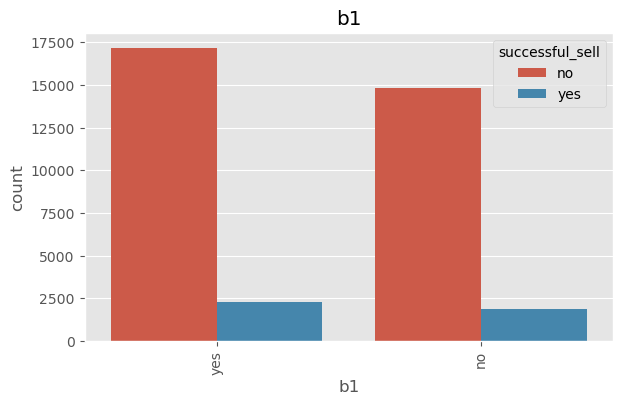

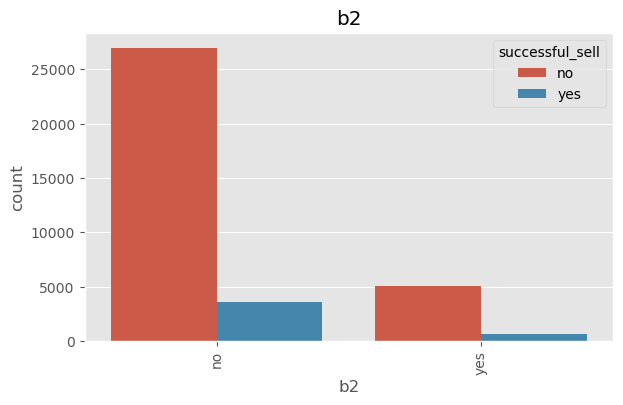

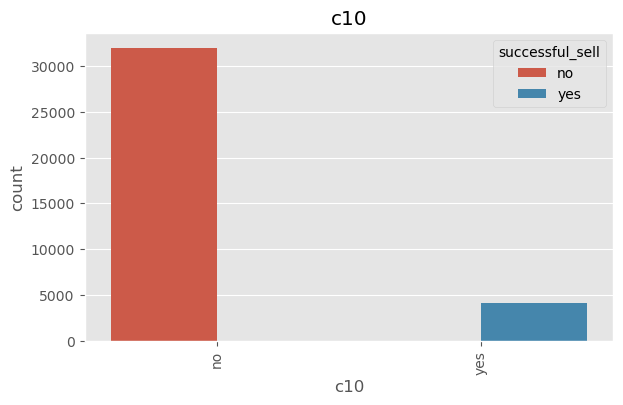

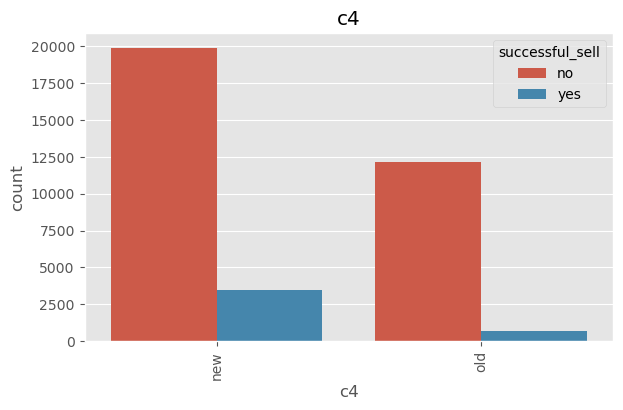

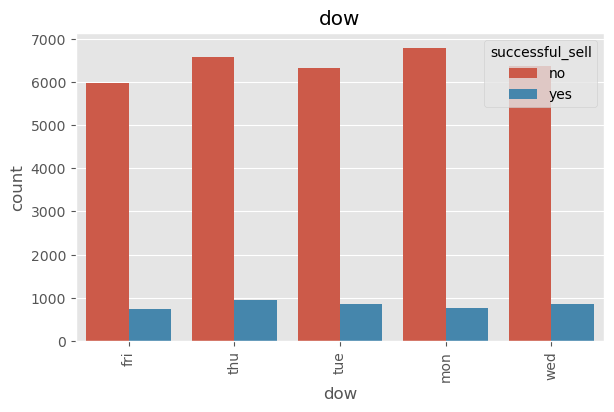

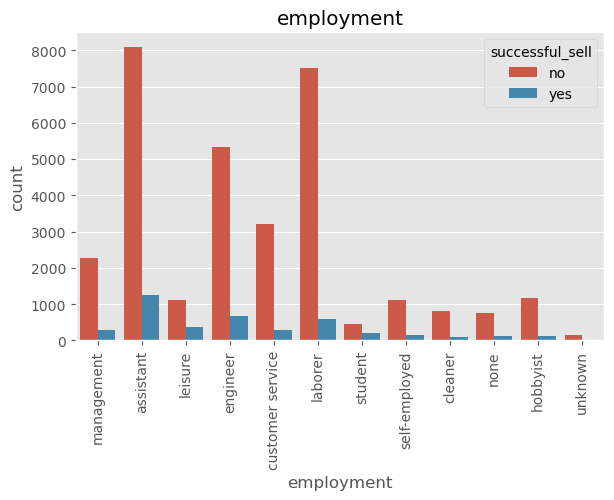

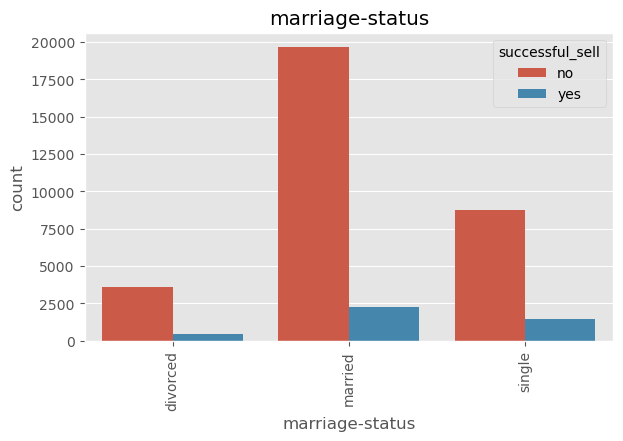

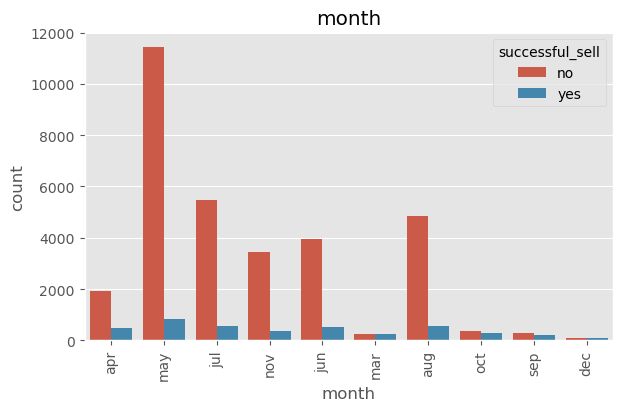

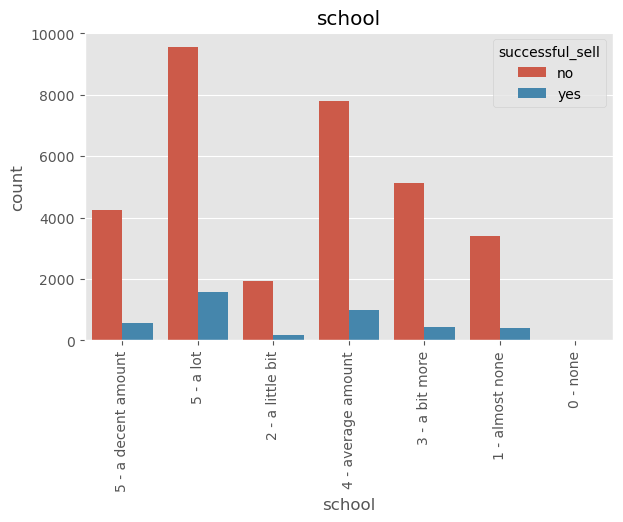

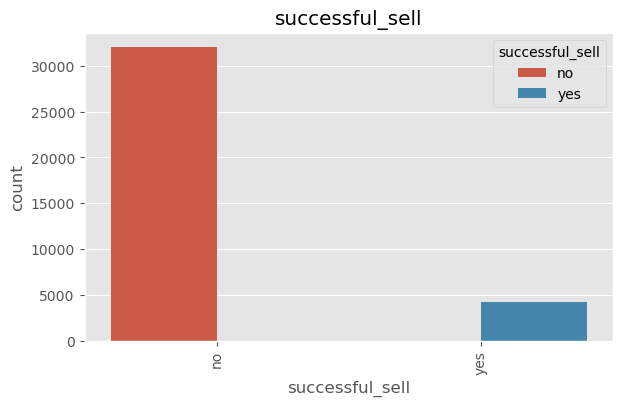

In [53]:
plt.style.use("ggplot")
for column in cat_cols:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.countplot(x = df[column], hue=df["successful_sell"])
    plt.title(column)    
    plt.xticks(rotation=90)

Plot the distribution of each numeric variable against the target variable

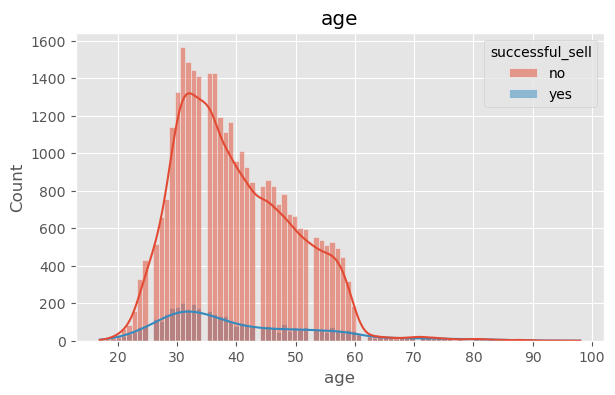

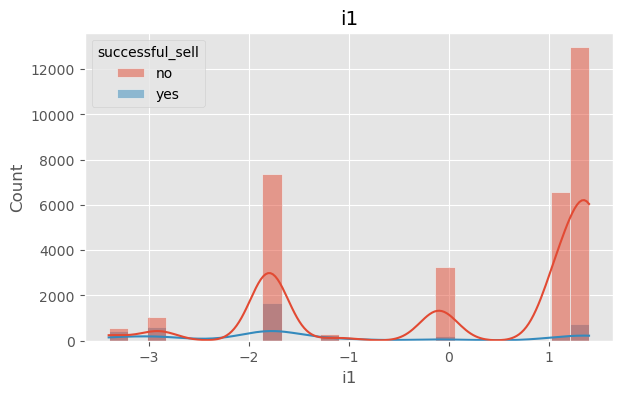

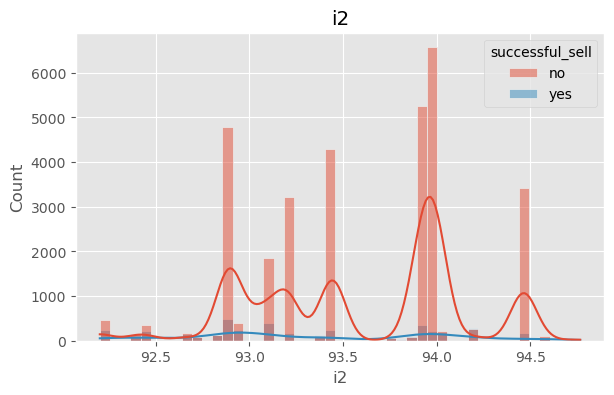

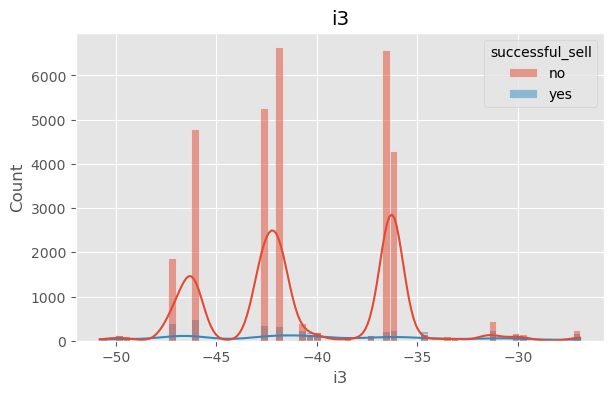

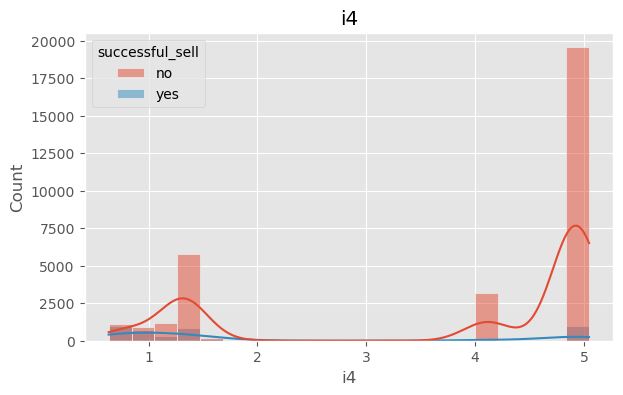

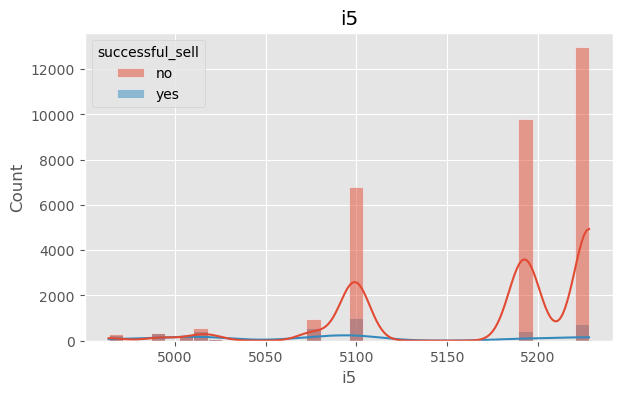

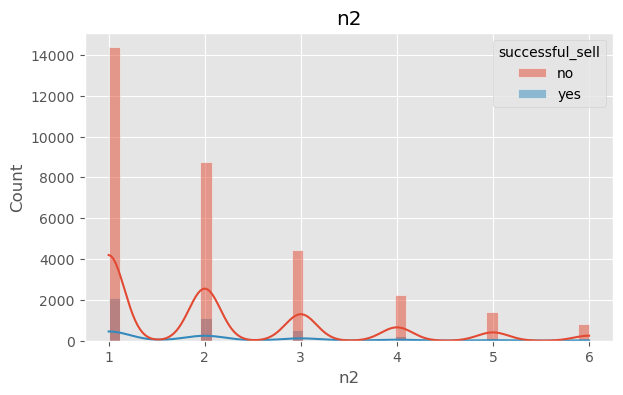

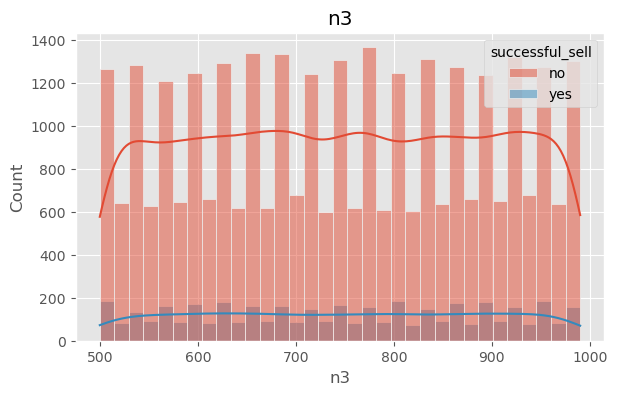

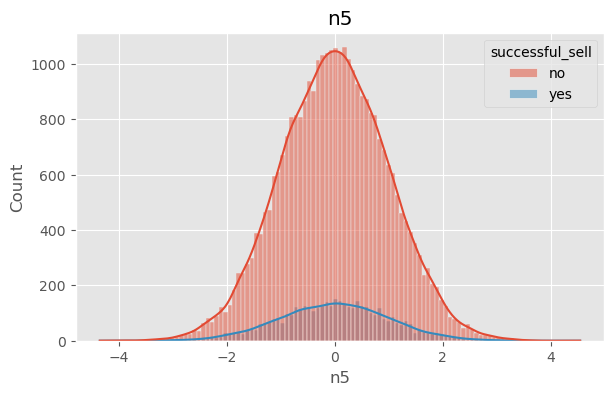

In [54]:
# Plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in num_cols:
    
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.histplot(df.reset_index(drop=True), x = df[column], kde=True, hue = df["successful_sell"])
    plt.title(column)
    

Observations from bivariate analysis:

1. Most purchasers are married and belong to the age group 30 to 40 years
2. Most purchasers were those that were last contacted in the month of May, on a Thursday.
3. Top 3 professions associated with the buyers – Assistant, Engineers, Laborer
4. Most purchasers are new buyers i.e have new accounts
5. People who have purchased the software are mostly those that have the field school = 5 (a lot)
6. b2 = no for majority of purchasers
7. b1 = yes for majority of purchasers
8. c10 has a 1:1 correlation with whether someone will eventually purchase or not.


### Encoding categorical variables

Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [55]:
# check categorical columns
for i in cat_cols:
    print(i, ":", df[i].unique())

b1 : ['yes' 'no']
b2 : ['no' 'yes']
c10 : ['no' 'yes']
c4 : ['new' 'old']
dow : ['fri' 'thu' 'tue' 'mon' 'wed']
employment : ['management' 'assistant' 'leisure' 'engineer' 'customer service'
 'laborer' 'student' 'self-employed' 'cleaner' 'none' 'hobbyist' 'unknown']
marriage-status : ['divorced' 'married' 'single']
month : ['apr' 'may' 'jul' 'nov' 'jun' 'mar' 'aug' 'oct' 'sep' 'dec']
school : ['5 - a decent amount' '5 - a lot' '2 - a little bit' '4 - average amount'
 '3 - a bit more' '1 - almost none' '0 - none']
successful_sell : ['no' 'yes']


Label Encoding will be used as One Hot Encoding would create too many columns

In [56]:
# Initializing label encoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# Iterating through each categorical feature and label encoding them
for feature in cat_cols:
    df[feature]= le.fit_transform(df[feature])

In [57]:
df.head()

,age,b1,b2,c10,c4,dow,employment,i1,i2,i3,i4,i5,marriage-status,month,n2,n3,n5,school,successful_sell
0,34,1,0,0,0,0,7,-1.8,93.075,-47.1,1.405,5099.1,0,0,2,530,0.001771,5,0
1,28,1,0,1,0,2,0,-1.8,92.893,-46.2,1.327,5099.1,0,6,1,750,-1.673152,6,1
2,55,0,0,0,0,3,6,1.4,93.918,-42.7,4.962,5228.1,1,3,3,600,0.927946,2,0
3,47,1,0,0,0,1,0,-0.1,93.200,-42.0,4.191,5195.8,1,7,1,860,0.203013,6,0
4,49,0,0,0,0,3,0,1.4,93.918,-42.7,4.961,5228.1,1,3,6,620,0.990804,6,0


### Checking Correlation of feature variables

<Axes: >

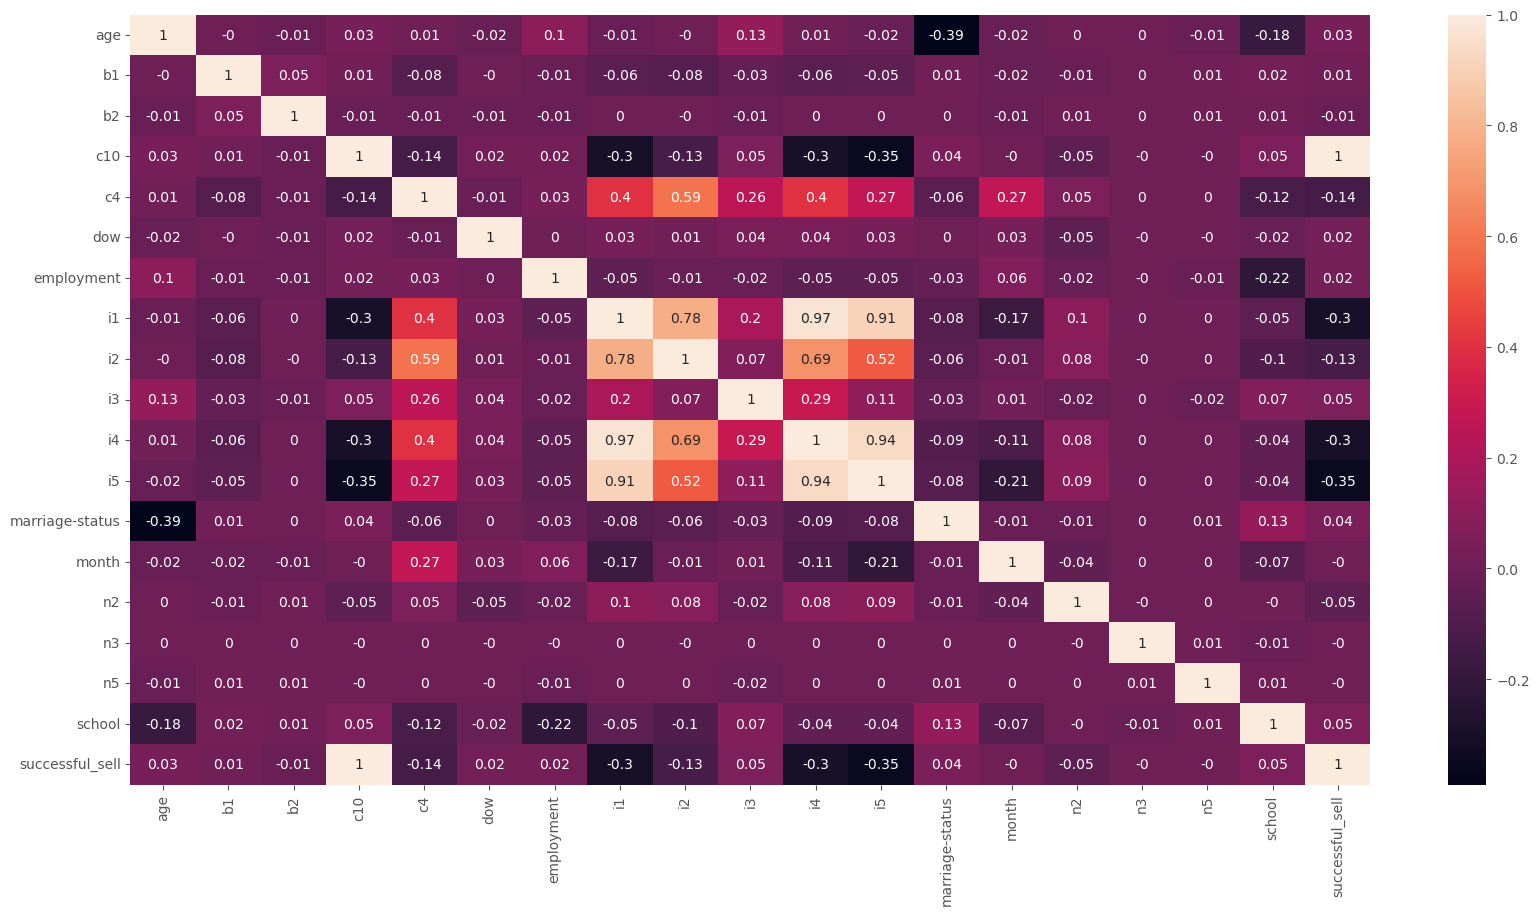

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),2), annot=True)

1. There is high corelation between i1, i4, i5 (close to 1) and therefore should be removed. These also have a poor corelation with the target variable successful_sell
2. c10 is identical to the target var successful_Sell, indicative of potential data leakage

These features can be removed for the sake of model simplicity and speed

In [59]:
# Drop i1, i4 and i5
df = df.drop(['i4','i1','i5','c10'], axis=1)

In [60]:
# Final dataframe
df

,age,b1,b2,c4,dow,employment,i2,i3,marriage-status,month,n2,n3,n5,school,successful_sell
0,34,1,0,0,0,7,93.075,-47.1,0,0,2,530,0.001771,5,0
1,28,1,0,0,2,0,92.893,-46.2,0,6,1,750,-1.673152,6,1
2,55,0,0,0,3,6,93.918,-42.7,1,3,3,600,0.927946,2,0
3,47,1,0,0,1,0,93.200,-42.0,1,7,1,860,0.203013,6,0
4,49,0,0,0,3,0,93.918,-42.7,1,3,6,620,0.990804,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,33,1,0,1,1,0,94.465,-41.8,1,4,3,620,-0.050022,4,0
41184,36,1,0,1,1,3,94.465,-41.8,1,4,1,650,-2.310504,6,0
41185,36,0,0,0,1,3,93.918,-42.7,0,3,3,620,2.144238,5,0
41186,50,0,0,1,0,4,94.465,-41.8,1,4,2,880,0.359144,1,0


### Separating independent and dependent variables

In [61]:
# Feature variables
x= df.iloc[:, :-1]

# Target variable
y= df.iloc[:, -1]

### Handling imbalanced dataset


Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.

In [62]:
# Initialising oversampling
from imblearn.over_sampling import SMOTE
smote= SMOTE()

# Implementing oversampling to training data
x_sm, y_sm= smote.fit_resample(x,y)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
y_sm.value_counts()


successful_sell
0    32031
1    32031
Name: count, dtype: int64

### Separating into test and train dataset

In [63]:
x_train, x_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [64]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (51249, 14)
Training Labels Shape: (51249,)
Testing Features Shape: (12813, 14)
Testing Labels Shape: (12813,)


## Model fitting and hyperparameter tuning

### Random Forest model

In [65]:
# Initializing a random forest classifier
rf = RandomForestClassifier() 

# Performing hyperparameter tuning using Randomized Search

# Define the parameter grid for RandomizedSearchCV
rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

# Randomized Search
randomsearch_rf= RandomizedSearchCV(rf, param_distributions=rf_param, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose = 2)
randomsearch_rf.fit(x_train, y_train)


print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

best score is: 0.9022810173032945
best parameters are: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy'}


Check model performance

In [66]:
# Perform predictions 
y_predicted_rf= randomsearch_rf.predict(x_test)

# Get predicted class probabilities for the test set 
y_predicted_rf_prob = randomsearch_rf.predict_proba(x_test)[:, 1] 

In [67]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_rf_prob, pos_label=1)

# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_predicted_rf_prob) 
roc_auc

0.9647534449629106

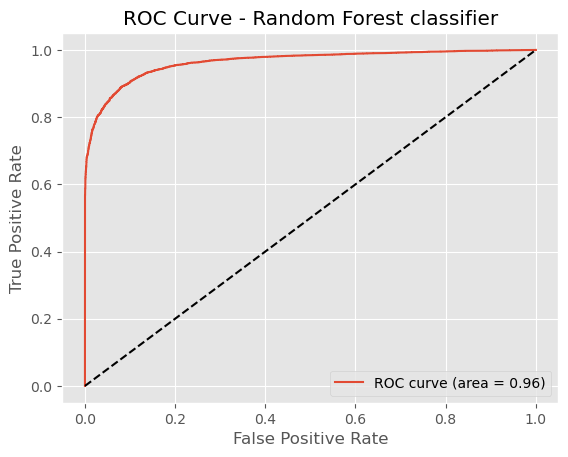

In [68]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# ROC curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve - Random Forest classifier') 
plt.legend(loc="lower right") 
plt.show()

[[5851  473]
 [ 778 5711]]
0.902364785764458
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6324
           1       0.92      0.88      0.90      6489

    accuracy                           0.90     12813
   macro avg       0.90      0.90      0.90     12813
weighted avg       0.90      0.90      0.90     12813



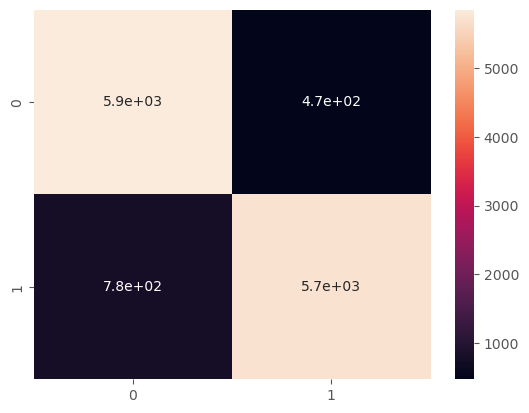

In [69]:
# Print confusion matrix
print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)

# Print accuracy and other evaluation metrics
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))

In [70]:
# Training accuracy
print ("Training accuracy for the Random Forest model: ", randomsearch_rf.score(x_train, y_train))

# Test Accuracy
print("Test accuracy for the Random Forest model: ", randomsearch_rf.score(x_test, y_test))

Training accuracy for the Random Forest model:  0.9539112958301625
Test accuracy for the Random Forest model:  0.902364785764458


## Gradient Boost model

In [71]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for RandomizedSearchCV
gb_param = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}
# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()
 
# Initialize RandomizedSearchCV
randomsearch_gb = RandomizedSearchCV(estimator=gb, param_distributions=gb_param, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose = 2)


randomsearch_gb.fit(x_train, y_train)


print("best score is:", randomsearch_gb.best_score_)
print("best parameters are:", randomsearch_gb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.901598058109179
best parameters are: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1577777777777778}


In [72]:
# Checking model performance
y_predicted_gb= randomsearch_gb.predict(x_test)


# Get predicted class probabilities for the test set 
y_predicted_gb_prob = randomsearch_gb.predict_proba(x_test)[:, 1] 

# Compute the false positive rate (FPR) and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_gb_prob, pos_label=1)

# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_predicted_gb_prob) 
roc_auc

0.9613311935763622

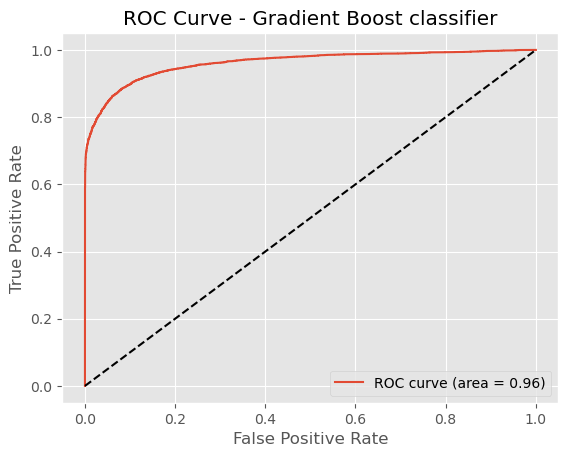

In [73]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# ROC curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve - Gradient Boost classifier') 
plt.legend(loc="lower right") 
plt.show()

[[5881  443]
 [ 842 5647]]
0.8997112307812378
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6324
           1       0.93      0.87      0.90      6489

    accuracy                           0.90     12813
   macro avg       0.90      0.90      0.90     12813
weighted avg       0.90      0.90      0.90     12813



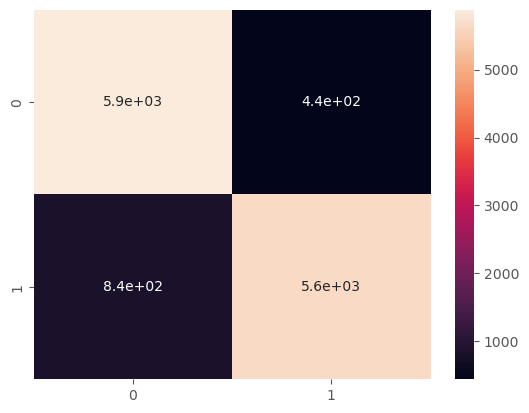

In [74]:
# Print confusion matrix
print(confusion_matrix(y_test, y_predicted_gb))
sns.heatmap(confusion_matrix(y_test, y_predicted_gb), annot=True)

# Print accuracy and other evaluation metrics
print(accuracy_score(y_test, y_predicted_gb))
print(classification_report(y_test, y_predicted_gb))

In [75]:
# Training accuracy
print("Training accuracy for the Gradient Boost model: ", randomsearch_gb.score(x_train, y_train))

#Test Accuracy
print("Test accuracy for the Gradient Boost model: ", randomsearch_gb.score(x_test, y_test))

Training accuracy for the Gradient Boost model:  0.9467696930671818
Test accuracy for the Gradient Boost model:  0.8997112307812378
